# WeatherPy

Three identified trends:

-There is a strong correlation between temperature and latitude. The data proves the general knowledge that it gets warmer closer to the equator.

-Correlations between latitude and wind speed as well as latitude and humidity are much lower. Latitude does not have an impact on these factors; the data reflects this.

-Cloudiness and latitude also have no strong correlation.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# List to hold responses (storing name, lat dups for simplicity of moving into dictionary)
country = []
city_name = []
lat = []
lng = []
temp = []
humidity = []
clouds = []
wind_speed = []
date_time = []

# Loop through cities list to perform a request for info on each
for city in cities:
    
    # Create query, make request, and store in json
    weather_response = requests.get(query_url + city).json()
    
    # Grab data where available
    try:
        country.append(weather_response['sys']['country'])
        city_name.append(weather_response['name'])
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        clouds.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        date_time.append(weather_response['dt'])
    
    # If any fields are blank, do not append to lists
    except:
        pass
    
    # Add interval between queries to stay within API query limits
    time.sleep(1)

# Print log
print(f"The weather API responded with: {city_name}.")

The weather API responded with: ['Jamestown', 'Cape Town', 'Upernavik', 'Bluff', 'Hailun', 'Margate', 'Busselton', 'Searcy', 'Ushuaia', 'Qaanaaq', 'Punta Arenas', 'Ponta Delgada', 'Khatanga', 'San Patricio', 'Cockburn Town', 'Zhigalovo', 'Sheopur', 'Mossamedes', 'Tuatapere', 'Butaritari', 'São Filipe', 'Paraúna', 'Hobart', 'Bubaque', 'Lata', 'Mackay', 'Sudak', 'Puerto Ayora', 'Nome', 'Kununurra', "Tigil'", 'Vuktyl', 'Nikolskoye', 'Tuktoyaktuk', 'Lagos', 'Albany', 'Rikitea', 'Saint Paul Harbor', 'Whitianga', 'Avarua', 'Sakaiminato', 'Saint-Augustin', 'Turukhansk', 'Sapouy', 'San Cristobal', 'Moramanga', 'Faanui', 'Sciacca', 'Norman Wells', 'Dinghaicun', 'Punalūr', 'Vaini', 'San Joaquin', 'New Norfolk', 'Broome', 'Hithadhoo', 'Firminy', 'East London', 'Chui', 'Clyde River', 'Nemuro', 'Gorneşti', 'Kavaratti', 'Tabon', 'Ponta do Sol', 'Meulaboh', "Arman'", 'Hermanus', 'Mandalī', 'Merauke', 'Tucuruí', 'Zaysan', 'Strezhevoy', "Severo-Kuril'sk", 'Hobyo', 'Morgan City', 'Mataura', 'Miandrivazo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create dictionary to hold response data for conversion into dataframe
weather_dict = {
    "country": country,
    "city": city_name,
    "lat": lat,
    "lng": lng,
    "temp": temp,
    "humidity": humidity,
    "cloudiness": clouds,
    "wind speed": wind_speed,
    "datetime": date_time
}

# Create dataframe
cities_df = pd.DataFrame(weather_dict)

# Display dataframe
cities_df.head()

,country,city,lat,lng,temp,humidity,cloudiness,wind speed,datetime
0,US,Jamestown,42.0970,-79.2353,-7.78,73,1,3.09,1613085479
1,ZA,Cape Town,-33.9258,18.4232,22.22,94,20,4.63,1613085100
2,GL,Upernavik,72.7868,-56.1549,-17.76,81,88,2.74,1613085482
3,NZ,Bluff,-46.6000,168.3333,14.44,72,42,4.02,1613085483
4,CN,Hailun,47.4500,126.9333,-7.17,96,32,3.82,1613085484


In [5]:
cities_df.to_csv("cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Import cities.csv so API doesn't need to be called again to work with data
final_cities = "cities.csv"

final_cities_df = pd.read_csv(final_cities)
final_cities_df.drop(["Unnamed: 0"], axis=1, inplace=True)

final_cities_df.head()

,country,city,lat,lng,temp,humidity,cloudiness,wind speed,datetime
0,US,Jamestown,42.0970,-79.2353,-7.78,73,1,3.09,1613085479
1,ZA,Cape Town,-33.9258,18.4232,22.22,94,20,4.63,1613085100
2,GL,Upernavik,72.7868,-56.1549,-17.76,81,88,2.74,1613085482
3,NZ,Bluff,-46.6000,168.3333,14.44,72,42,4.02,1613085483
4,CN,Hailun,47.4500,126.9333,-7.17,96,32,3.82,1613085484


In [7]:
# Get the indices of cities that have humidity over 100%.
humidity_error = final_cities_df.loc[final_cities_df["humidity"] > 100]
humidity_error

,country,city,lat,lng,temp,humidity,cloudiness,wind speed,datetime


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

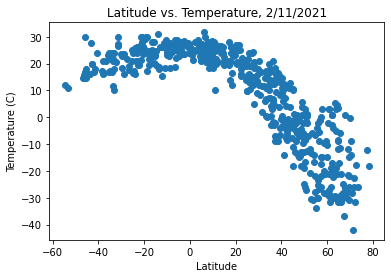

<Figure size 432x288 with 0 Axes>

In [8]:
plt.scatter(final_cities_df.iloc[:,2],final_cities_df.iloc[:,4])
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.title("Latitude vs. Temperature, 2/11/2021")
plt.show()

# Save as .png
plt.savefig('lat_temp.png')

## Latitude vs. Humidity Plot

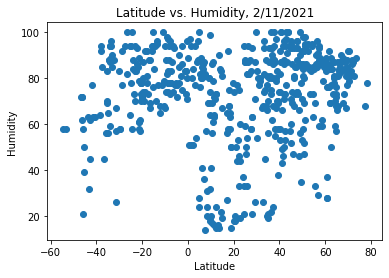

<Figure size 432x288 with 0 Axes>

In [9]:
plt.scatter(final_cities_df.iloc[:,2],final_cities_df.iloc[:,5])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity, 2/11/2021")
plt.show()

# Save as .png
plt.savefig('lat_hum.png')

## Latitude vs. Cloudiness Plot

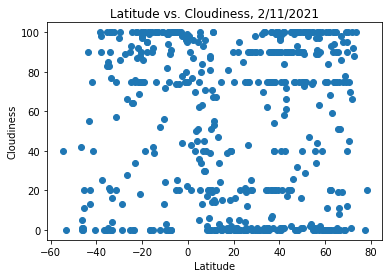

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(final_cities_df.iloc[:,2],final_cities_df.iloc[:,6])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness, 2/11/2021")
plt.show()

# Save as .png
plt.savefig('lat_clouds.png')

## Latitude vs. Wind Speed Plot

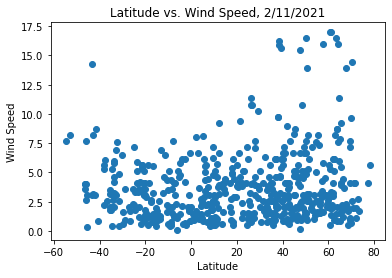

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(final_cities_df.iloc[:,2],final_cities_df.iloc[:,7])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed, 2/11/2021")
plt.show()

# Save as .png
plt.savefig('lat_wind.png')

## Linear Regression

In [13]:
# Create northern hemisphere dataframe
northern_hem = final_cities_df[["country", "city", "lat", "lng", "temp", "humidity", "cloudiness",
                                "wind speed", "datetime"]].loc[(final_cities_df["lat"] >= 0)]

# Create southern hemisphere dataframe
southern_hem = final_cities_df[["country", "city", "lat", "lng", "temp", "humidity", "cloudiness",
                                "wind speed", "datetime"]].loc[(final_cities_df["lat"] <= 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

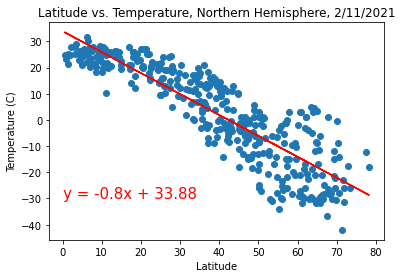

<Figure size 432x288 with 0 Axes>

In [14]:
# Create scatter plot
plt.scatter(northern_hem.iloc[:,2],northern_hem.iloc[:,4])
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.title("Latitude vs. Temperature, Northern Hemisphere, 2/11/2021")

# Calculate and apply linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem.iloc[:,2],northern_hem.iloc[:,4])
regress_values_north_temp = northern_hem.iloc[:,2] * slope + intercept
line_eq_north_temp = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hem.iloc[:,2],regress_values_north_temp,"r-")
plt.annotate(line_eq_north_temp,(0,-30),fontsize=15,color="red")

plt.show()

# Save as .png
plt.savefig('lat_north_temp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

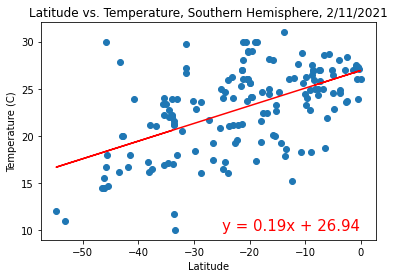

<Figure size 432x288 with 0 Axes>

In [15]:
# Create scatter plot
plt.scatter(southern_hem.iloc[:,2],southern_hem.iloc[:,4])
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.title("Latitude vs. Temperature, Southern Hemisphere, 2/11/2021")

# Calculate and apply linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem.iloc[:,2],southern_hem.iloc[:,4])
regress_values_south_temp = southern_hem.iloc[:,2] * slope + intercept
line_eq_south_temp = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hem.iloc[:,2],regress_values_south_temp,"r-")
plt.annotate(line_eq_south_temp,(-25,10),fontsize=15,color="red")

plt.show()

# Save as .png
plt.savefig('lat_south_temp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

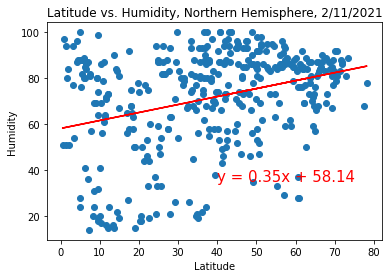

<Figure size 432x288 with 0 Axes>

In [16]:
# Create scatter plot
plt.scatter(northern_hem.iloc[:,2],northern_hem.iloc[:,5])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity, Northern Hemisphere, 2/11/2021")

# Calculate and apply linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem.iloc[:,2],northern_hem.iloc[:,5])
regress_values_north_hum = northern_hem.iloc[:,2] * slope + intercept
line_eq_north_hum = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hem.iloc[:,2],regress_values_north_hum,"r-")
plt.annotate(line_eq_north_hum,(40,35),fontsize=15,color="red")

plt.show()

# Save as .png
plt.savefig('lat_north_hum.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

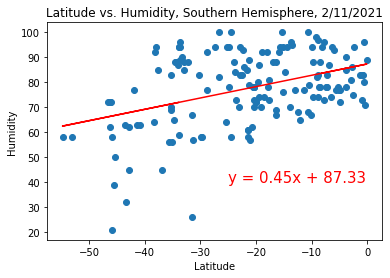

<Figure size 432x288 with 0 Axes>

In [17]:
# Create scatter plot
plt.scatter(southern_hem.iloc[:,2],southern_hem.iloc[:,5])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity, Southern Hemisphere, 2/11/2021")

# Calculate and apply linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem.iloc[:,2],southern_hem.iloc[:,5])
regress_values_south_hum = southern_hem.iloc[:,2] * slope + intercept
line_eq_south_hem = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hem.iloc[:,2],regress_values_south_hum,"r-")
plt.annotate(line_eq_south_hem,(-25,40),fontsize=15,color="red")

plt.show()

# Save as .png
plt.savefig('lat_south_hum.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

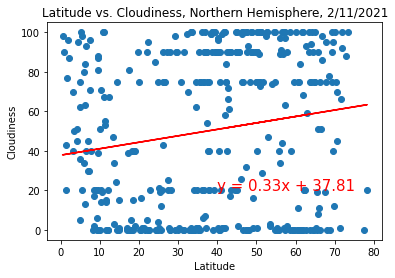

<Figure size 432x288 with 0 Axes>

In [22]:
# Create scatter plot
plt.scatter(northern_hem.iloc[:,2],northern_hem.iloc[:,6])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness, Northern Hemisphere, 2/11/2021")

# Calculate and apply linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem.iloc[:,2],northern_hem.iloc[:,6])
regress_values_north_cloud = northern_hem.iloc[:,2] * slope + intercept
line_eq_north_cloud = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hem.iloc[:,2],regress_values_north_cloud,"r-")
plt.annotate(line_eq_north_cloud,(40,20),fontsize=15,color="red")

plt.show()

# Save as .png
plt.savefig('lat_north_clouds.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

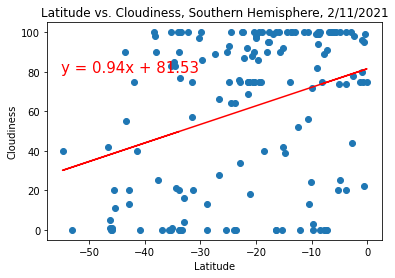

<Figure size 432x288 with 0 Axes>

In [19]:
# Create scatter plot
plt.scatter(southern_hem.iloc[:,2],southern_hem.iloc[:,6])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness, Southern Hemisphere, 2/11/2021")

# Calculate and apply linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem.iloc[:,2],southern_hem.iloc[:,6])
regress_values_south_cloud = southern_hem.iloc[:,2] * slope + intercept
line_eq_south_cloud = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hem.iloc[:,2],regress_values_south_cloud,"r-")
plt.annotate(line_eq_south_cloud,(-55,80),fontsize=15,color="red")

plt.show()

# Save as .png
plt.savefig('lat_south_clouds.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

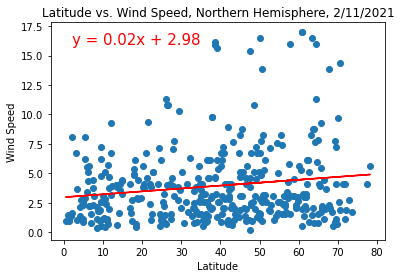

<Figure size 432x288 with 0 Axes>

In [20]:
# Create scatter plot
plt.scatter(northern_hem.iloc[:,2],northern_hem.iloc[:,7])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed, Northern Hemisphere, 2/11/2021")

# Calculate and apply linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem.iloc[:,2],northern_hem.iloc[:,7])
regress_values_north_wind = northern_hem.iloc[:,2] * slope + intercept
line_eq_north_wind = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hem.iloc[:,2],regress_values_north_wind,"r-")
plt.annotate(line_eq_north_wind,(2,16),fontsize=15,color="red")

plt.show()

# Save as .png
plt.savefig('lat_north_wind.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

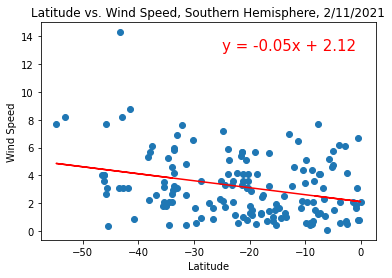

<Figure size 432x288 with 0 Axes>

In [21]:
# Create scatter plot
plt.scatter(southern_hem.iloc[:,2],southern_hem.iloc[:,7])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed, Southern Hemisphere, 2/11/2021")

# Calculate and apply linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem.iloc[:,2],southern_hem.iloc[:,7])
regress_values_south_wind = southern_hem.iloc[:,2] * slope + intercept
line_eq_south_wind = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hem.iloc[:,2],regress_values_south_wind,"r-")
plt.annotate(line_eq_south_wind,(-25,13),fontsize=15,color="red")

plt.show()

# Save as .png
plt.savefig('lat_south_wind.png')